# Comparing Manifold Embeddings

In [1]:
"""
    TITLE   : Comparing Manifold Embeddings
    PROJECT : Thesis
""";

__author__ = 'Nathaniel Starkman'

<span style='font-size:30px;font-weight:650'>
    About
</span>

Comparing Manifold Embedding Techniques


<br><br>

- - - 


## Prepare

### Imports

In [2]:
from astroplan import download_IERS_A
download_IERS_A()

In [3]:
from utilipy import ipython

ipython.run_imports(base=True, astropy=True, galpy=True,
                    plotly=True, matplotlib=True,
                    verbose_imports=False)

# THIRD PARTY

import sklearn
from sklearn.manifold import SpectralEmbedding, Isomap, LocallyLinearEmbedding, MDS
import utilipy.data_utils as data_utils

# PROJECT-SPECIFIC

import starkman_thesis as thesis
from starkman_thesis.utils import tracks


set autoreload to 1


In [4]:
rnd = np.random.default_rng()
rnd

Generator(PCG64) at 0x7FF58D656C70

<br><br>

- - - 


## Ordered Orbit Data

In [5]:
time = np.linspace(0, 200, num=100) * u.Myr
pot = potential.MWPotential2014

o = Orbit()
o.integrate(time, pot)

osc = o.SkyCoord(o.time()).galactocentric.cartesian.without_differentials()
Xo = osc.get_xyz().T

In [6]:
clrO = np.linspace(0, 256, len(Xo))

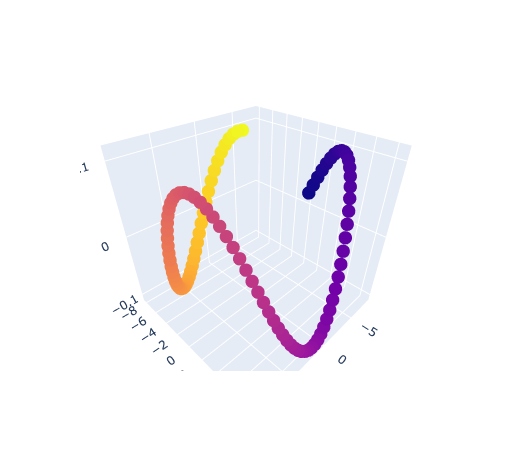

In [7]:
trace = go.Scatter3d(x=osc.x, y=osc.y, z=osc.z,
                     mode="markers", marker=dict(color=clrO))

fig = go.Figure(data=trace)
fig.show()

### Spectral Embedding

In [8]:
embedding = SpectralEmbedding(n_components=2)
X_xfm = embedding.fit_transform(Xo)

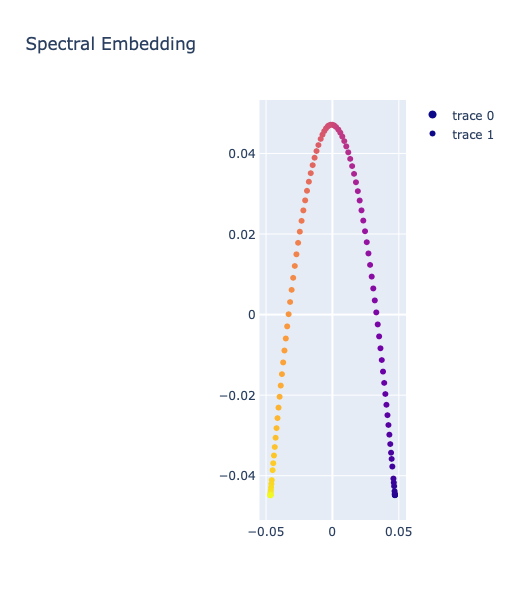

In [9]:
fig = make_subplots(rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'scatter'}]],
);
_ = fig.add_trace(
    go.Scatter3d(x=osc.x, y=osc.y, z=osc.z, mode="markers", marker=dict(color=clrO)),
    row=1, col=1
);
_ = fig.add_trace(
    go.Scatter(x=X_xfm[:, 0], y=X_xfm[:, 1], mode="markers", marker=dict(color=clrO)),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="Spectral Embedding")

### Isometric mapping

In [10]:
embedding = Isomap(n_components=2)
X_xfm = embedding.fit_transform(Xo)

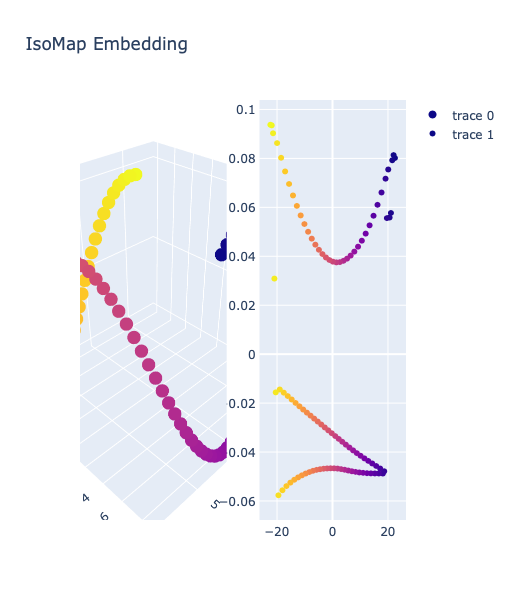

In [11]:
fig = make_subplots(rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'scatter'}]],
);
_ = fig.add_trace(
    go.Scatter3d(x=osc.x, y=osc.y, z=osc.z, mode="markers", marker=dict(color=clrO)),
    row=1, col=1
);
_ = fig.add_trace(
    go.Scatter(x=X_xfm[:, 0], y=X_xfm[:, 1], mode="markers", marker=dict(color=clrO)),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="IsoMap Embedding")

### Locally Linear Embedding

In [12]:
embedding1 = LocallyLinearEmbedding(n_components=2, method="standard")
X_xfm1 = embedding1.fit_transform(Xo)

embedding2 = LocallyLinearEmbedding(n_components=2, method='modified')
X_xfm2 = embedding2.fit_transform(Xo)

# embedding3 = LocallyLinearEmbedding(n_components=2, method='hessian')
# X_xfm3 = embedding3.fit_transform(Xo)

embedding4 = LocallyLinearEmbedding(n_components=2, method='ltsa')
X_xfm4 = embedding4.fit_transform(Xo)

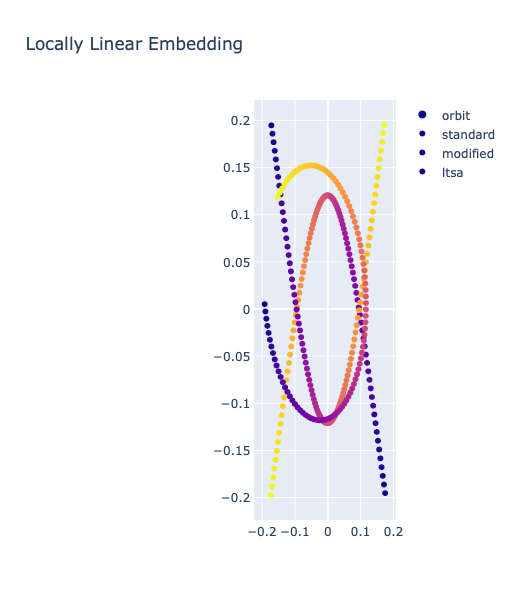

In [13]:
fig = make_subplots(rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'scatter'}]],
);
_ = fig.add_trace(
    go.Scatter3d(x=osc.x, y=osc.y, z=osc.z, name="orbit", mode="markers", marker=dict(color=clrO)),
    row=1, col=1
);
_ = fig.add_trace(
    go.Scatter(x=X_xfm1[:, 0], y=X_xfm1[:, 1], name="standard", mode="markers", marker=dict(color=clrO)),
    row=1, col=2
)
_ = fig.add_trace(
    go.Scatter(x=X_xfm2[:, 0], y=X_xfm2[:, 1], name="modified", mode="markers", marker=dict(color=clrO)),
    row=1, col=2
)
# _ = fig.add_trace(
#     go.Scatter(x=X_xfm3[:, 0], y=X_xfm3[:, 1], name="hessian", mode="markers", marker=dict(color=clrO)),
#     row=1, col=2
# )
_ = fig.add_trace(
    go.Scatter(x=X_xfm4[:, 0], y=X_xfm4[:, 1], name="ltsa", mode="markers", marker=dict(color=clrO)),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="Locally Linear Embedding")

### MultiDimensional Scaling

In [14]:
embedding = MDS(n_components=2)
X_xfm = embedding.fit_transform(Xo)

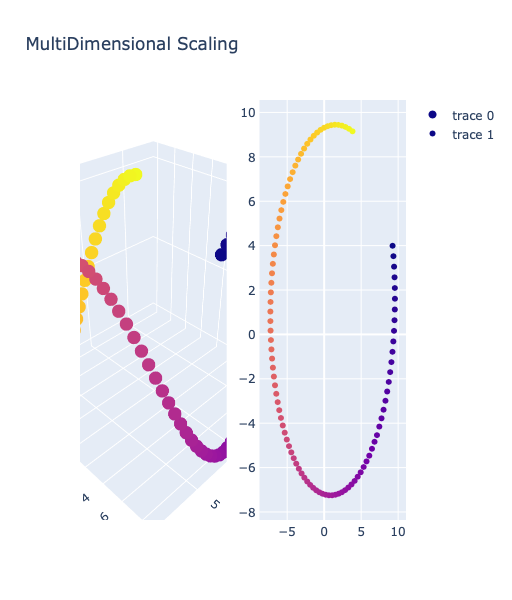

In [15]:
fig = make_subplots(rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'scatter'}]],
);
_ = fig.add_trace(
    go.Scatter3d(x=osc.x, y=osc.y, z=osc.z, mode="markers", marker=dict(color=clrO)),
    row=1, col=1
);
_ = fig.add_trace(
    go.Scatter(x=X_xfm[:, 0], y=X_xfm[:, 1], mode="markers", marker=dict(color=clrO)),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="MultiDimensional Scaling")

### Results

The best results are from Spectral Embedding or Locally Linear Embedding. I was fitting and tranforming the whole data set, but with Locally Linear Embedding
this can be broken into two steps, fitting on one data set, then transforming another. This is perfect as two similar curves can be transformed with the
same trained embedding. This will be especially useful for creating a data embedding and using that on all mock streams.

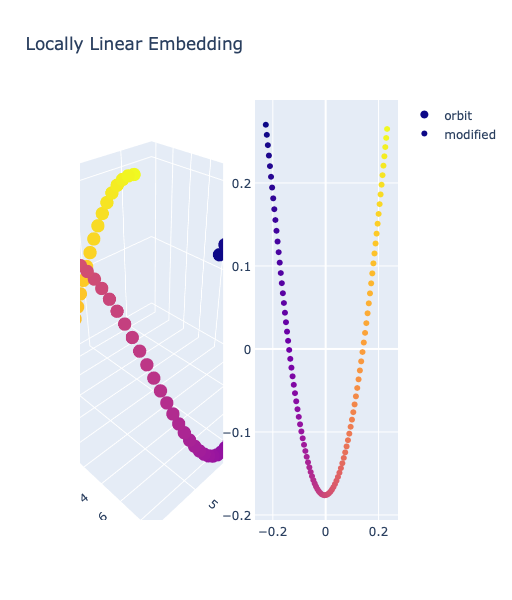

In [16]:
embedding = LocallyLinearEmbedding(n_components=2, method='modified', random_state=0).fit(Xo[::2])
X_xfm = embedding.transform(Xo)

fig = make_subplots(rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'scatter'}]],
);
_ = fig.add_trace(
    go.Scatter3d(x=osc.x, y=osc.y, z=osc.z, name="orbit", mode="markers", marker=dict(color=clrO)),
    row=1, col=1
);
_ = fig.add_trace(
    go.Scatter(x=X_xfm[:, 0], y=X_xfm[:, 1], name="modified", mode="markers", marker=dict(color=clrO)),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="Locally Linear Embedding")

The next step is to figure out how to use the embedding vector along with the arc length in the embedding space to get the arc length in the original Cartesian space. Also how to do this for a spherical projection.

<br><br>

- - - 


## Unordered Orbit Data

In [18]:
shuffler, undo = data_utils.shuffle(len(Xo))

Xou = Xo[shuffler]
clrOu = clrO[shuffler]

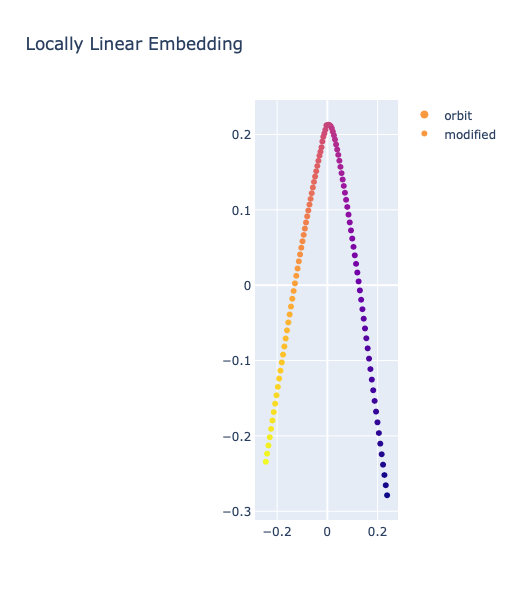

In [19]:
embedding = LocallyLinearEmbedding(n_components=2, method='modified', random_state=0).fit(Xou[::2])
X_xfm = embedding.transform(Xou)

fig = make_subplots(rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'scatter'}]],
);
_ = fig.add_trace(
    go.Scatter3d(x=osc.x, y=osc.y, z=osc.z, name="orbit", mode="markers", marker=dict(color=clrOu)),
    row=1, col=1
);
_ = fig.add_trace(
    go.Scatter(x=X_xfm[:, 0], y=X_xfm[:, 1], name="modified", mode="markers", marker=dict(color=clrOu)),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="Locally Linear Embedding")

It's not quite as beautiful, but it definitely work.

<br><br>

- - - 


## Unordered, Noisy, Orbit Data

Convolving with a Gaussian to approximate measurement error

In [20]:
from scipy.ndimage import gaussian_filter

In [21]:
Xouc = np.c_[gaussian_filter(Xou[:, 0], sigma=0.35), gaussian_filter(Xou[:, 1], sigma=0.35), gaussian_filter(Xou[:, 2], sigma=0.08)]

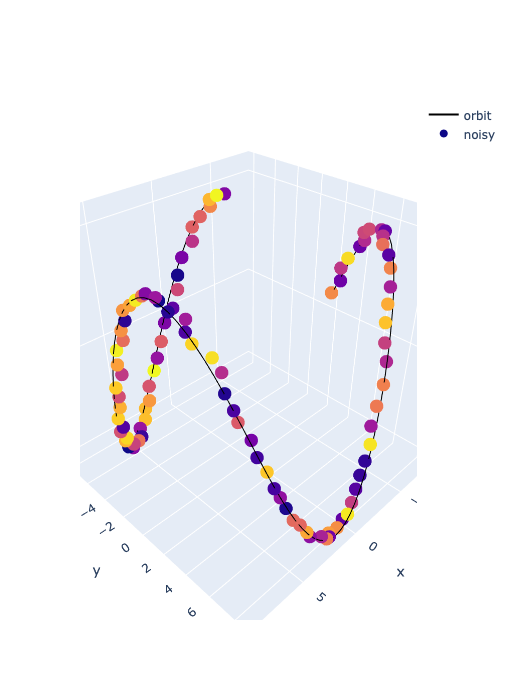

In [22]:
trace1 = go.Scatter3d(x=osc.x, y=osc.y, z=osc.z,
                     name="orbit", mode="lines", marker=dict(color='black'))

trace2 = go.Scatter3d(x=Xouc[:,0], y=Xouc[:,1], z=Xouc[:,2],
                     name="noisy", mode="markers", marker=dict(color=clrO))

layout = go.Layout(width=700, height=700)

fig = go.Figure(
    data=[trace1, trace2],
    layout=layout
)
fig.show()

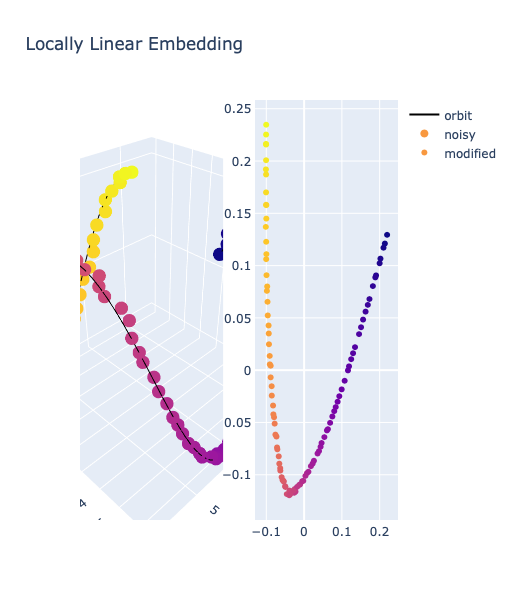

In [23]:
embedding = LocallyLinearEmbedding(n_components=2, random_state=0, method='modified', n_neighbors=5, )
embedding = embedding.fit(Xouc)
X_xfm = embedding.transform(Xouc)

fig = make_subplots(rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'scatter'}]],
);
_ = fig.add_trace(
    go.Scatter3d(x=osc.x, y=osc.y, z=osc.z, name="orbit", mode="lines", marker=dict(color='black')),
    row=1, col=1
);
_ = fig.add_trace(
    go.Scatter3d(x=Xouc[:, 0], y=Xouc[:, 1], z=Xouc[:, 2], name="noisy", mode="markers", marker=dict(color=clrOu)),
    row=1, col=1
)
_ = fig.add_trace(
    go.Scatter(x=X_xfm[:, 0], y=X_xfm[:, 1], name="modified", mode="markers", marker=dict(color=clrOu)),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="Locally Linear Embedding")

<br><br>

- - - 

<span style='font-size:40px;font-weight:650'>
    END
</span>